<a href="https://colab.research.google.com/github/Ahmed-Camara/Edge-Detection/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
#from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def load_image_as_grayscale(path):
    img = Image.open(path) #read the image
#     img = img.resize((32,32)) #resize the image
    img = np.array(img) #convert image to numpy array
    return rgb2gray(img) # convert RGB to grayscale and return

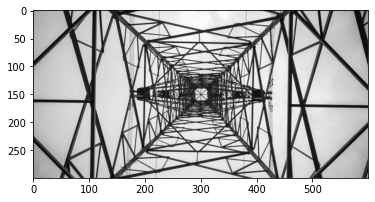

In [4]:
img = load_image_as_grayscale('/content/drive/MyDrive/ML_DL_practice/Edge Detection/data/structure.jpg')

plt.imshow(img, cmap='gray')

In [5]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 2D Convolution
To start the 2D Convolution method, we will have the following method header:<br>
                  ```
                  def convolve2D(image, kernel, padding=0, strides=1):``` <br>
Such that the image and kernel are specified by the user and the default padding around the image is 0 and default stride is 1.

The next thing that we must do is apply cross correlation to our kernel and this can be done using NumPy very easily through just flipping the matrix horizontally then vertically. This looks like:
                        <br>`kernel = np.flipud(np.fliplr(kernel))`<br>
We then need to compute the matrix size of our outputted image. This can very simply be done through the formula:
![](https://github.com/redwankarimsony/CNN-Explainer-for-Beginners/blob/main/dim.png?raw=1)

This must be implemented in each dimension (x, y). To start, we must gather the x and y size of the image and kernel. This can be done through:
```
xKernShape = kernel.shape[0] 
yKernShape = kernel.shape[1] 
xImgShape = image.shape[0] 
yImgShape = image.shape[0]
```



In [6]:
def Custom_Convolve2D(X, kernel, padding=0, strides=1):
    
    
    
    kh,kw = kernel.shape
    sum = 0
    h, w = kernel.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * kernel).sum()
    return Y

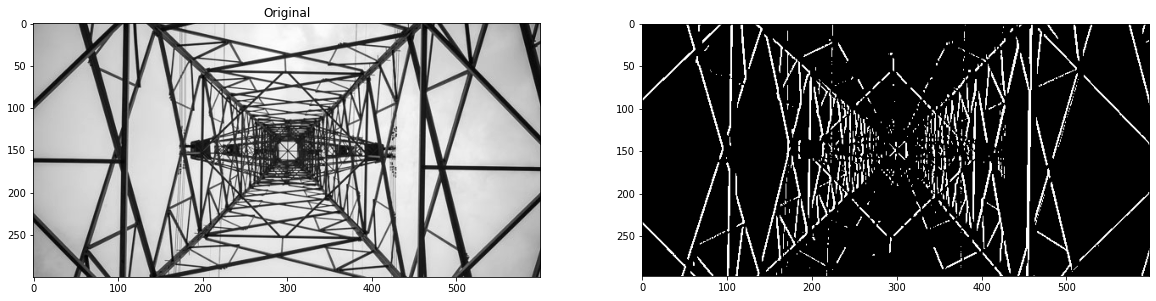

In [7]:
img = load_image_as_grayscale('/content/drive/MyDrive/ML_DL_practice/Edge Detection/data/structure.jpg')
output = Custom_Convolve2D(X=img, kernel= kernel)
result = (output-output.min())/(output.max() - output.min())

f, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title('Original')

axarr[1].imshow((result>0.6)*1., cmap = 'gray')